In [1]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings

# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


# Tensorflow sequential models
from tensorflow import keras
from keras import backend as clear
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.optimizers import RMSprop

from tensorflow.keras.layers import GRU
from tensorflow.keras.constraints import MaxNorm
from keras.wrappers.scikit_learn import KerasClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix


In [2]:
#忽略警告訊息
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("C:/Users/king0/OneDrive/桌面/DL DATA/NVDA15-23Class.csv")
data

,Date,Y,Lag_1,Lag_2,Lag_3
0,2015/1/2,1,5.012500,5.092500,5.140000
1,2015/1/5,0,5.032500,5.012500,5.092500
2,2015/1/6,0,4.947500,5.032500,5.012500
3,2015/1/7,0,4.797500,4.947500,5.032500
4,2015/1/8,1,4.785000,4.797500,4.947500
...,...,...,...,...,...
2109,2023/5/19,0,316.779999,301.779999,292.130005
2110,2023/5/22,0,312.640015,316.779999,301.779999
2111,2023/5/23,0,311.760010,312.640015,316.779999
2112,2023/5/24,0,306.880005,311.760010,312.640015


In [4]:
#把資料切成X，Y
x = data.drop(['Y'],axis=1).copy()
x = x.drop(['Date'],axis=1).copy()
print(x.head())

print('')

y = data['Y'].copy()
print(y.head())

    Lag_1   Lag_2   Lag_3
0  5.0125  5.0925  5.1400
1  5.0325  5.0125  5.0925
2  4.9475  5.0325  5.0125
3  4.7975  4.9475  5.0325
4  4.7850  4.7975  4.9475

0    1
1    0
2    0
3    0
4    1
Name: Y, dtype: int64


count    2114.000000
mean        0.543992
std         0.498179
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Y, dtype: float64

# Rolling window

In [5]:
#Rolling window 切資料
x_train1 = x[0:422]
x_validation1 = x[422:844]
y_train1 = y[0:422]
y_validation1 = y[422:844]

x_train2 = x[422:844]
x_validation2 = x[844:1266]
y_train2 = y[422:844]
y_validation2 = y[844:1266]

x_train3 = x[844:1266]
x_validation3 = x[1266:1688]
y_train3 = y[844:1266]
y_validation3 = y[1266:1688]

# 第一組正規化

In [6]:
#做正規化
MMscaler=MinMaxScaler(feature_range=(0, 1))
normalize_df=MMscaler.fit_transform(x_train1)
new_x_train1=pd.DataFrame(data=normalize_df)
new_x_train1.columns=x.columns
print(new_x_train1.head())

#做正規化
MMscaler=MinMaxScaler(feature_range=(0, 1))
normalize_df=MMscaler.fit_transform(x_validation1)
new_x_validation1=pd.DataFrame(data=normalize_df)
new_x_validation1.columns=x.columns
print(new_x_validation1.head())

      Lag_1     Lag_2     Lag_3
0  0.020677  0.028018  0.032346
1  0.022495  0.020729  0.028018
2  0.014769  0.022551  0.020729
3  0.001136  0.014806  0.022551
4  0.000000  0.001139  0.014806
      Lag_1     Lag_2     Lag_3
0  0.015762  0.019009  0.009531
1  0.018852  0.015762  0.019009
2  0.013982  0.018852  0.015762
3  0.016339  0.013982  0.018852
4  0.000000  0.016339  0.013982


# 第二組正規化

In [7]:
#做正規化
MMscaler=MinMaxScaler(feature_range=(0, 1))
normalize_df=MMscaler.fit_transform(x_train2)
new_x_train2=pd.DataFrame(data=normalize_df)
new_x_train2.columns=x.columns
print(new_x_train2.head())

#做正規化
MMscaler=MinMaxScaler(feature_range=(0, 1))
normalize_df=MMscaler.fit_transform(x_validation2)
new_x_validation2=pd.DataFrame(data=normalize_df)
new_x_validation2.columns=x.columns
print(new_x_validation2.head())

      Lag_1     Lag_2     Lag_3
0  0.015762  0.019009  0.009531
1  0.018852  0.015762  0.019009
2  0.013982  0.018852  0.015762
3  0.016339  0.013982  0.018852
4  0.000000  0.016339  0.013982
      Lag_1     Lag_2     Lag_3
0  0.793074  0.759921  0.749322
1  0.819879  0.793074  0.759921
2  0.785371  0.819879  0.793074
3  0.790486  0.785371  0.819879
4  0.730096  0.790486  0.785371


# 第三組正規化

In [8]:
#做正規化
MMscaler=MinMaxScaler(feature_range=(0, 1))
normalize_df=MMscaler.fit_transform(x_train3)
new_x_train3=pd.DataFrame(data=normalize_df)
new_x_train3.columns=x.columns
print(new_x_train3.head())

#做正規化
MMscaler=MinMaxScaler(feature_range=(0, 1))
normalize_df=MMscaler.fit_transform(x_validation3)
new_x_validation3=pd.DataFrame(data=normalize_df)
new_x_validation3.columns=x.columns
print(new_x_validation3.head())

      Lag_1     Lag_2     Lag_3
0  0.793074  0.759921  0.749322
1  0.819879  0.793074  0.759921
2  0.785371  0.819879  0.793074
3  0.790486  0.785371  0.819879
4  0.730096  0.790486  0.785371
      Lag_1     Lag_2     Lag_3
0  0.077483  0.066804  0.064992
1  0.070931  0.077483  0.066804
2  0.068547  0.070931  0.077483
3  0.073231  0.068547  0.070931
4  0.073719  0.073231  0.068547


In [9]:
#第一組
def create_model(learning_rate=0.01, Droprate1=0, optimizer='Adam'):
    clear.clear_session()
    model = tf.keras.models.Sequential([
        tf.keras.layers.GRU(64, activation='relu', return_sequences=True, input_shape=(new_x_train1.shape[1], 1)),
        tf.keras.layers.Dropout(rate=Droprate1),
        tf.keras.layers.GRU(32, activation='relu', input_shape=(new_x_train1.shape[1], 1)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=32, verbose=0)

param_grid = [{
    'optimizer': ['Adam', 'SGD', 'RMSprop'],
    'Droprate1': [0, 0.2, 0.3, 0.4],
    'learning_rate': [0.01, 0.05, 0.1]
}]

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, scoring='accuracy')
grid_result = grid.fit(new_x_train1, y_train1 , validation_data=(new_x_validation1, y_validation1))
print(grid_result.best_params_,' score ：',grid_result.best_score_)


{'Droprate1': 0, 'learning_rate': 0.01, 'optimizer': 'SGD'}  score ： 0.5618487394957984


In [10]:
#第二組
def create_model(learning_rate=0.01, Droprate1=0, optimizer='Adam'):
    clear.clear_session()
    model = tf.keras.models.Sequential([
        tf.keras.layers.GRU(64, activation='relu', return_sequences=True, input_shape=(new_x_train1.shape[1], 1)),
        tf.keras.layers.Dropout(rate=Droprate1),
        tf.keras.layers.GRU(32, activation='relu', input_shape=(new_x_train1.shape[1], 1)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=32, verbose=0)

param_grid = [{
    'optimizer': ['Adam', 'SGD', 'RMSprop'],
    'Droprate1': [0, 0.2, 0.3, 0.4],
    'learning_rate': [0.01, 0.05, 0.1]
}]

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, scoring='accuracy')
grid_result = grid.fit(new_x_train2, y_train2 , validation_data=(new_x_validation2, y_validation2))
print(grid_result.best_params_,' score ：',grid_result.best_score_)

{'Droprate1': 0, 'learning_rate': 0.01, 'optimizer': 'Adam'}  score ： 0.5522128851540616


In [11]:
#第三組
def create_model(learning_rate=0.01, Droprate1=0, optimizer='Adam'):
    clear.clear_session()
    model = tf.keras.models.Sequential([
        tf.keras.layers.GRU(64, activation='relu', return_sequences=True, input_shape=(new_x_train1.shape[1], 1)),
        tf.keras.layers.Dropout(rate=Droprate1),
        tf.keras.layers.GRU(32, activation='relu', input_shape=(new_x_train1.shape[1], 1)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=32, verbose=0)

param_grid = [{
    'optimizer': ['Adam', 'SGD', 'RMSprop'],
    'Droprate1': [0, 0.2, 0.3, 0.4],
    'learning_rate': [0.01, 0.05, 0.1]
}]

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, scoring='accuracy')
grid_result = grid.fit(new_x_train3, y_train3 , validation_data=(new_x_validation3, y_validation3))
print(grid_result.best_params_,' score ：',grid_result.best_score_)

{'Droprate1': 0, 'learning_rate': 0.01, 'optimizer': 'SGD'}  score ： 0.5285994397759104


# 最後建模

In [12]:
# 6.1 Create the model
clear.clear_session()
model=Sequential()

# 6.2 Add input layer & first hidden layer
model.add(GRU(units=64, input_dim=3, activation='relu' , return_sequences=True, input_shape=(new_x_train1.shape[1], 1)))

model.add(Dropout(rate=0))

model.add(GRU(units=32, activation='relu'))

# 6.5 Add output layer
model.add(Dense(units=1, activation='sigmoid'))

# 6.6 Compile the defined Net
#opt=SGD(learning_rate=0.0001,momentum=0.5)
opt=SGD(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Finally check the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 3, 64)             12864     
                                                                 
 dropout (Dropout)           (None, 3, 64)             0         
                                                                 
 gru_1 (GRU)                 (None, 32)                9408      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 22,305
Trainable params: 22,305
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Store in the history for more useful information
history=model.fit(x[0:1688], y[0:1688], epochs=150, batch_size=32,verbose=1)

Epoch 1/150
53/53 [==============================] - 3s 4ms/step - loss: 0.7152 - accuracy: 0.5273
Epoch 2/150
53/53 [==============================] - 0s 4ms/step - loss: 0.6959 - accuracy: 0.5326
Epoch 3/150
53/53 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5480
Epoch 4/150
53/53 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.5456
Epoch 5/150
53/53 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5373
Epoch 6/150
53/53 [==============================] - 0s 4ms/step - loss: 0.6909 - accuracy: 0.5403
Epoch 7/150
53/53 [==============================] - 0s 4ms/step - loss: 0.6911 - accuracy: 0.5367
Epoch 8/150
53/53 [==============================] - 0s 4ms/step - loss: 0.6912 - accuracy: 0.5444
Epoch 9/150
53/53 [==============================] - 0s 4ms/step - loss: 0.6898 - accuracy: 0.5527
Epoch 10/150
53/53 [==============================] - 0s 4ms/step - loss: 0.6914 - accuracy: 0.5427
Epoch 11/

In [14]:
# 7.3 Save the trained model
#Fmodel.save('D:/data_analysis/PyExport/Rainfall_forecast_ANN_trained_model.h5')
# Colab
model.save('D:/python/GRUClass.h5')
print('Model has been saved...')

Model has been saved...


In [12]:
# 7.4 Restore the saved model for testing
#ANN_model=keras.models.load_model('D:/data_analysis/PyExport/Rainfall_forecast_ANN_trained_model.h5')
# Colab
model=keras.models.load_model('D:/python/GRUClass.h5')
print('Model successfully loaded...')

Model successfully loaded...


# testing

In [13]:
# 8.1 Make prediction 
prediction=ANN_model.predict_on_batch(x[1688:])
prediction

array([[0.5395239 ],
       [0.5395052 ],
       [0.5396408 ],
       [0.54009515],
       [0.54038346],
       [0.54018444],
       [0.5397503 ],
       [0.5395281 ],
       [0.5397904 ],
       [0.5403793 ],
       [0.5408762 ],
       [0.54092807],
       [0.5408623 ],
       [0.54129726],
       [0.54147506],
       [0.5412321 ],
       [0.54078895],
       [0.5406625 ],
       [0.5407483 ],
       [0.54084355],
       [0.54078674],
       [0.5404664 ],
       [0.54004526],
       [0.5397487 ],
       [0.53957236],
       [0.53956515],
       [0.53949606],
       [0.5392662 ],
       [0.53910786],
       [0.538677  ],
       [0.5388264 ],
       [0.53823954],
       [0.5379325 ],
       [0.5377687 ],
       [0.5376937 ],
       [0.5375999 ],
       [0.53747696],
       [0.53833747],
       [0.5375833 ],
       [0.5380596 ],
       [0.53802985],
       [0.5381068 ],
       [0.5379286 ],
       [0.53780514],
       [0.5378571 ],
       [0.5378074 ],
       [0.537836  ],
       [0.538

In [14]:
# 8.2 Transform the predictions to 0 and 1 
testing_prediction=(ANN_model.predict_on_batch(x[1688:]) >= 0.5).astype('int')
testing_prediction

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [15]:
# 8.3 Calculating the mertics
testing_acc=accuracy_score(y[1688:],testing_prediction)
testing_f1s=f1_score(y[1688:],testing_prediction,pos_label=1)
testing_pre=precision_score(y[1688:],testing_prediction,pos_label=1)
testing_sen=sensitivity_score(y[1688:],testing_prediction,pos_label=1)
testing_spe=specificity_score(y[1688:],testing_prediction,pos_label=1)
testing_cm=confusion_matrix(y[1688:],testing_prediction)
print('Testing result:')
print('Testing ACC:',round(testing_acc*100,2))
print('Testing f1s:',round(testing_f1s*100,2))
print('Testing pre:',round(testing_pre*100,2))
print('Testing sen:',round(testing_sen*100,2))
print('Testing spe:',round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(testing_cm)

Testing result:
Testing ACC: 51.64
Testing f1s: 68.11
Testing pre: 51.64
Testing sen: 100.0
Testing spe: 0.0

Testing confusion matrix:
[[  0 206]
 [  0 220]]


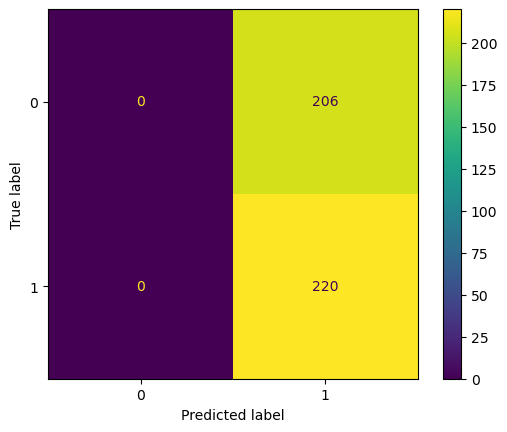

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(testing_cm,display_labels=["0","1"]).plot()

14/14 [==============================] - 1s 3ms/step


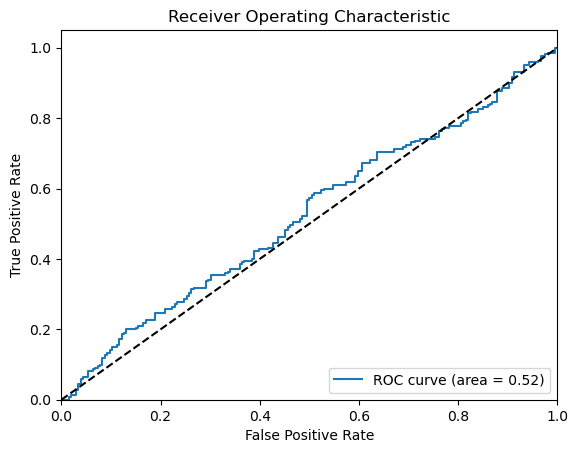

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 預測機率
y_scores = model.predict(x[1688:])

# 計算假陽性率（FPR）、真陽性率（TPR）和閾值（thresholds）
fpr, tpr, thresholds = roc_curve(y[1688:], y_scores)

# 計算AUC
roc_auc = auc(fpr, tpr)

# 繪製ROC曲線
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
